<a href="https://colab.research.google.com/github/VikitoHextech/TAREAS-SIMULACION/blob/main/MonteCarloPyE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Metodo de Monte Carlo: Prueba y Error**


A continuación se estima el valor de la integral:

\begin{equation}
 I = \int_{a=0}^{b = 1} \sqrt{arcatan(x)}~dx
\end{equation}

Sabiendo lo siguiente:

\begin{equation}
  I = \int_{a}^{b} g(x)dx = \int_{a}^{b} w(x)f(x)~dx = E[g(x)] \approx \frac{1}{N} ~ \sum_{N}^{i = 1} g(x_i)
\end{equation}

Teniendo en cuenta que:

\begin{equation}
  w(x) = g(x)(b-a) \\
  f(x) = \frac{1}{b-a} ⇒ U(a,b)
\end{equation}

Siguiendo la instruccion: \\
Elaborar un código en Python que implemente la estimación de la integral de una función mediante el método de Monte Carlo de Acierto y Error. Como prueba use la función del ejemplo visto en clase (raíz cuadrada del arco tangente de x).
Es necesario que el programa de explícitamente el resultado: la estimación de la integral y su error.

Estimación para 10 muestras: 0.6203588478169305
Error para 10 muestras: 0.009464496391042854
 
Estimación para 20 muestras: 0.4874248089990169
Error para 20 muestras: 0.14239853520895646
 
Estimación para 30 muestras: 0.6203588478169305
Error para 30 muestras: 0.009464496391042854
 
Estimación para 40 muestras: 0.5760475015442926
Error para 40 muestras: 0.05377584266368074
 
Estimación para 50 muestras: 0.5671852322897651
Error para 50 muestras: 0.06263811191820823
 
Estimación para 100 muestras: 0.5760475015442926
Error para 100 muestras: 0.05377584266368074
 
Estimación para 500 muestras: 0.6132690324133084
Error para 500 muestras: 0.016554311794664933
 
Estimación para 1000 muestras: 0.6301073439969108
Error para 1000 muestras: 0.00028399978893745015
 
Estimación para 5000 muestras: 0.6299300986118204
Error para 5000 muestras: 0.00010675440384699808
 
Estimación para 10000 muestras: 0.6264738136025546
Error para 10000 muestras: 0.00334953060541876
 


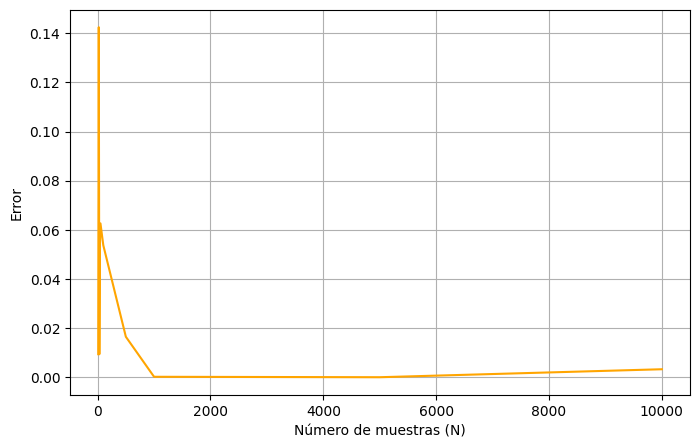

In [21]:
import random as rdm
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.integrate import quad

#En esencia es una copia del metodo de monte carlo crudo pero efectuado a prueba y error, por eso la similitud

def estimaraciertoerror(func, a, b, nmuestras):
    x_vals = np.linspace(a, b, 1000)
    y_vals = [func(x) for x in x_vals]
    ymax = max(y_vals)
    aciertos = 0
    for i in range(nmuestras):
        x_random = rdm.uniform(a, b)
        y_random = rdm.uniform(0, ymax)

        if y_random <= func(x_random):
            aciertos += 1 #Guardar los aciertos

    area_rectangulo = (b - a) * ymax
    estimado = area_rectangulo * (aciertos / nmuestras)

    return estimado

#---------------------------------------------------------------------#
def funcion(x):
    return m.sqrt(m.atan(x))  # g(x)
#---------------------------------------------------------------------#
a = 0
b = 1
valores_n = [10, 20, 30, 40, 50, 100, 500, 1000, 5000, 10000]
aproximaciones = []
errores = []

valor_real, _ = quad(funcion, a, b)

for nmuestras in valores_n:
    resultado = estimaraciertoerror(funcion, a, b, nmuestras)
    error = abs(valor_real - resultado)
    aproximaciones.append(resultado)
    errores.append(error)
    print(f"Estimación para {nmuestras} muestras: {resultado}")
    print(f"Error para {nmuestras} muestras: {error}")
    print(" ") #ESPACIAR
#---------------------------------------------------------------------#
# Grafica del errorx
plt.figure(figsize=(8, 5))
plt.plot(valores_n, errores, color='orange')
plt.xlabel("Número de muestras (N)")
plt.ylabel("Error")
plt.grid(True)
plt.show()

*GRAFICA DE LA FUNCION*
Para mejor entendimiento, la grafica de la funcion se presenta continuacion

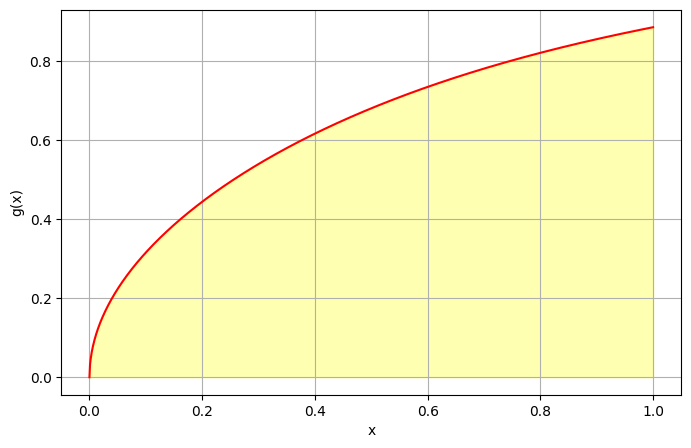

In [16]:
x_vals = np.linspace(a, b, 1000)
y_vals = [funcion(x) for x in x_vals]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label="g(x) = √arctan(x)", color='red')
plt.fill_between(x_vals, y_vals, alpha=0.3, color='yellow')
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)
plt.show()
